In [1]:
pip install pandas numpy matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jupyterlab openpyxl plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [9]:
# ----------------------------------
# Step 1: Import Libraries
# ----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Configure plots
plt.style.use("seaborn-v0_8-darkgrid")   # or 'seaborn-v0_8-whitegrid'
sns.set_palette("Set2")

In [10]:
df = pd.read_csv("TATAMOTORS_NSE_1995-2025.csv")
# Quick look
df.head()


,Unnamed: 0,Date,Symbol,Open,High,Low,Close,PrevClose,Volume,Turnover,VWAP,Trades,Daily_Return_%,MA_20,MA_50
0,223,1995-01-02,TATAMOTORS,517.5,524.7,517.5,524.2,522.0,1100,573530.0,521.39,NaN,0.421456,NaN,NaN
1,224,1995-01-03,TATAMOTORS,518.0,520.0,515.0,515.0,524.2,1500,775450.0,516.97,NaN,-1.755055,NaN,NaN
2,225,1995-01-04,TATAMOTORS,515.0,515.0,515.0,515.0,515.0,300,154500.0,515.00,NaN,0.000000,NaN,NaN
3,226,1995-01-05,TATAMOTORS,480.0,480.0,480.0,480.0,515.0,50,24000.0,480.00,NaN,-6.796117,NaN,NaN
4,227,1995-01-06,TATAMOTORS,495.0,501.0,495.0,498.7,480.0,200,99550.0,497.75,NaN,3.895833,NaN,NaN


In [11]:
# ----------------------------------
# Step 3: Explore Data Structure
# ----------------------------------
print("Shape of dataset:", df.shape)
print("\nColumn Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include="all"))

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())


Shape of dataset: (7804, 15)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7804 non-null   int64  
 1   Date            7804 non-null   object 
 2   Symbol          7804 non-null   object 
 3   Open            7804 non-null   float64
 4   High            7804 non-null   float64
 5   Low             7804 non-null   float64
 6   Close           7804 non-null   float64
 7   PrevClose       7804 non-null   float64
 8   Volume          7804 non-null   int64  
 9   Turnover        7804 non-null   float64
 10  VWAP            7804 non-null   float64
 11  Trades          3617 non-null   float64
 12  Daily_Return_%  7804 non-null   float64
 13  MA_20           7785 non-null   float64
 14  MA_50           7755 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 914.7+ KB
None

Summary Statis

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


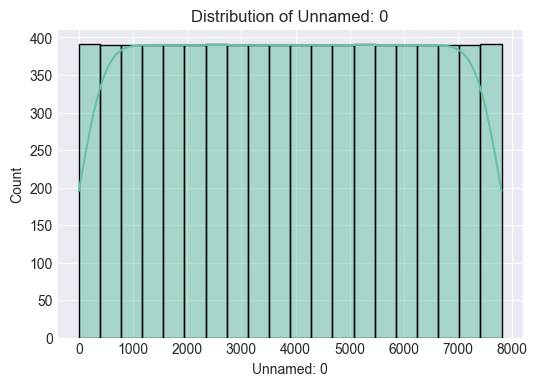

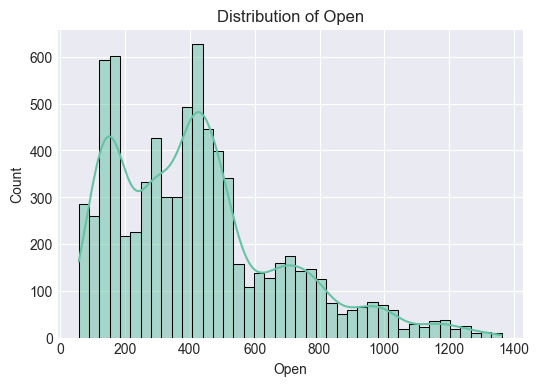

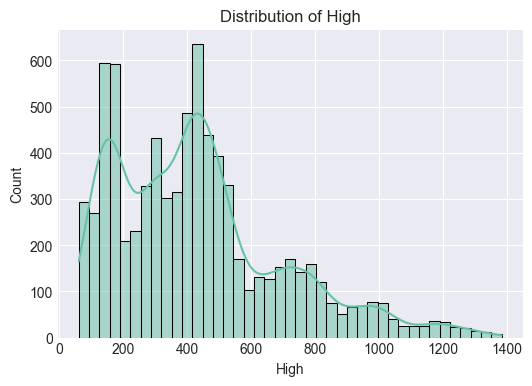

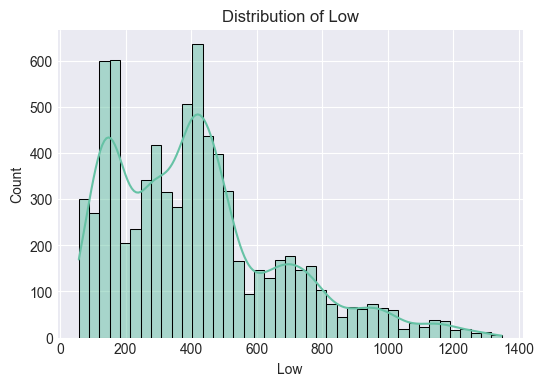

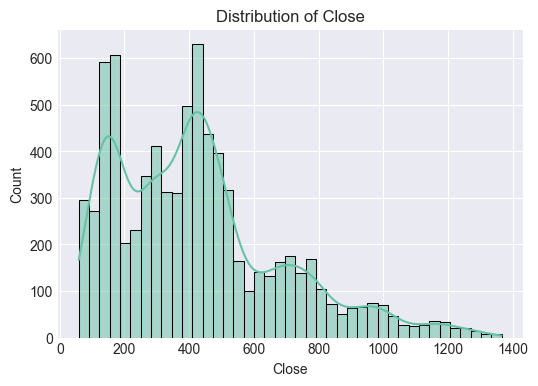

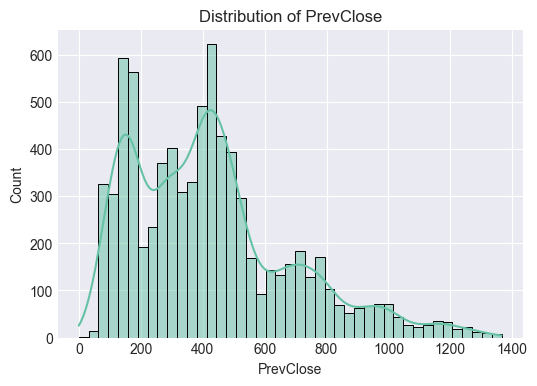

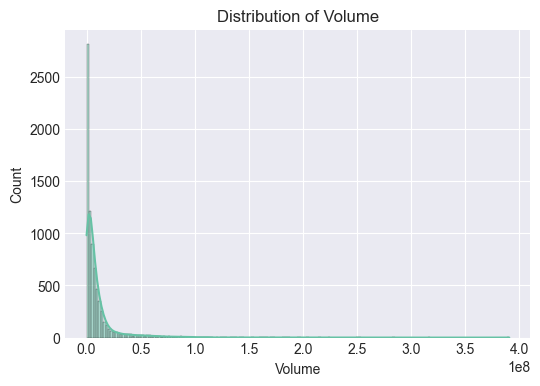

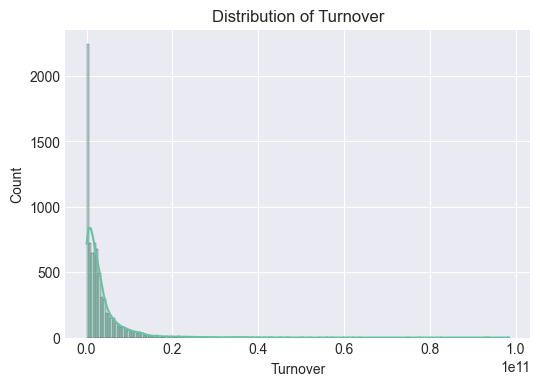

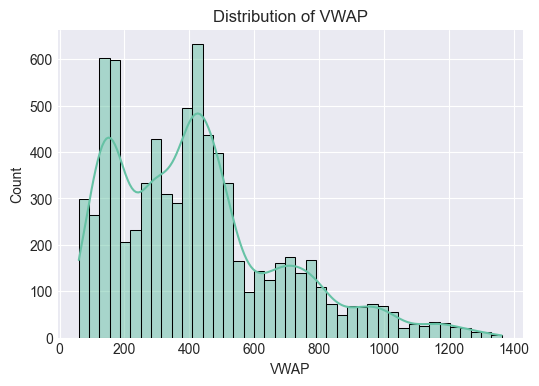

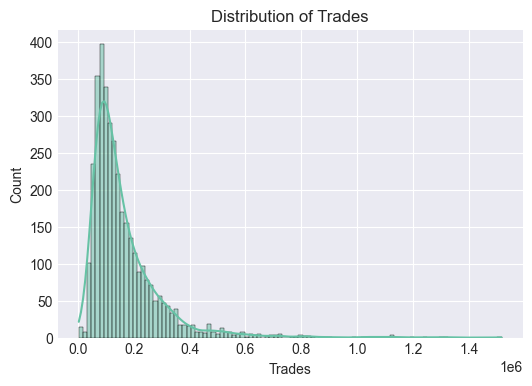

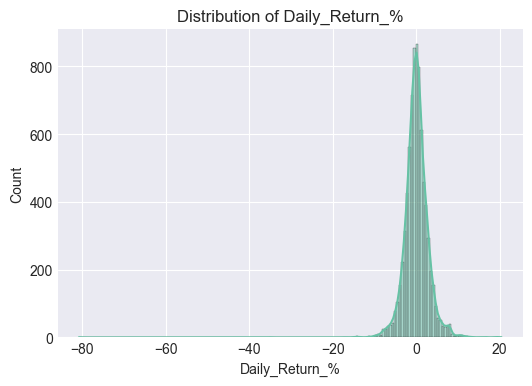

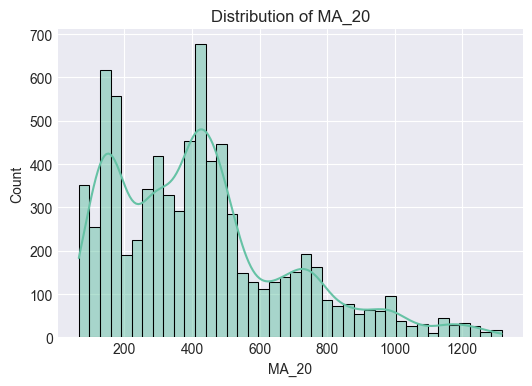

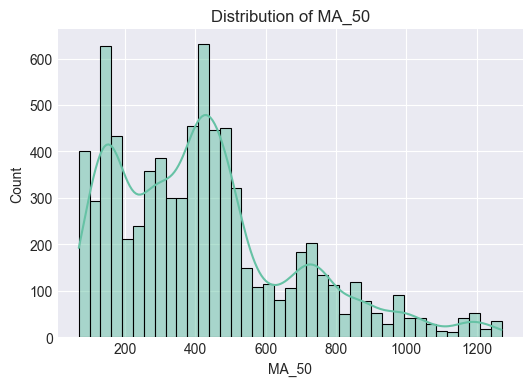

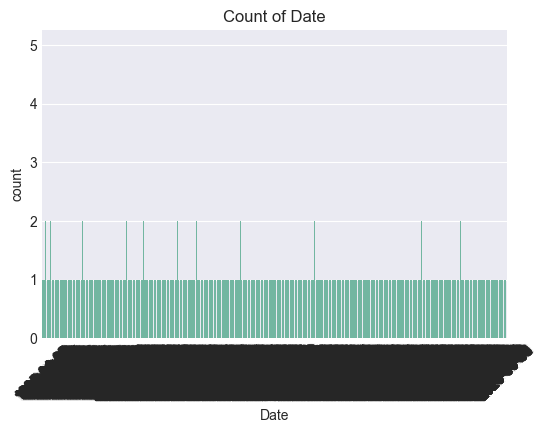

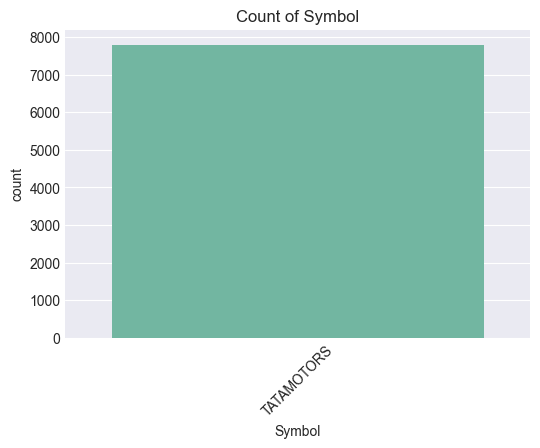

In [12]:
# ----------------------------------
# Step 4: Univariate Analysis
# ----------------------------------

# Example: Numerical columns
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Example: Categorical columns
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


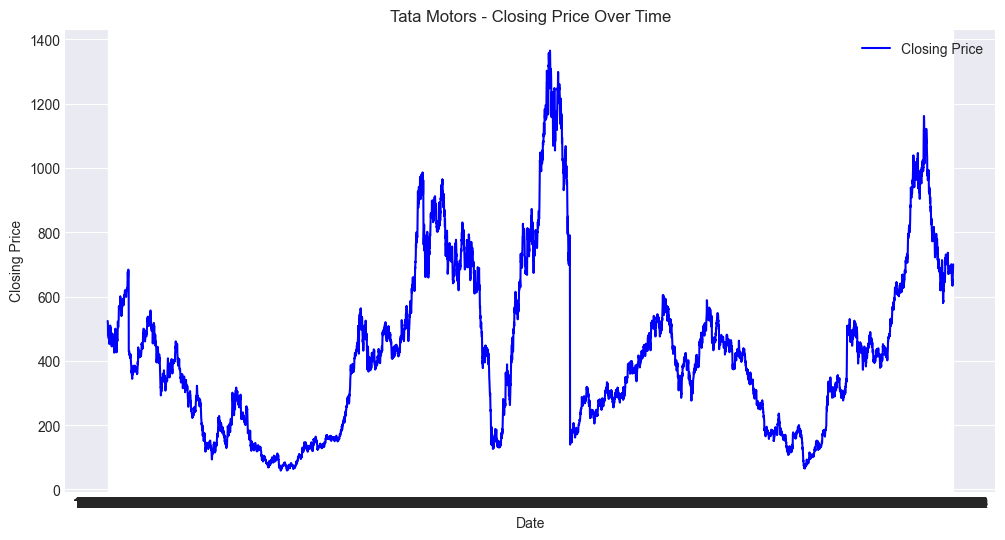

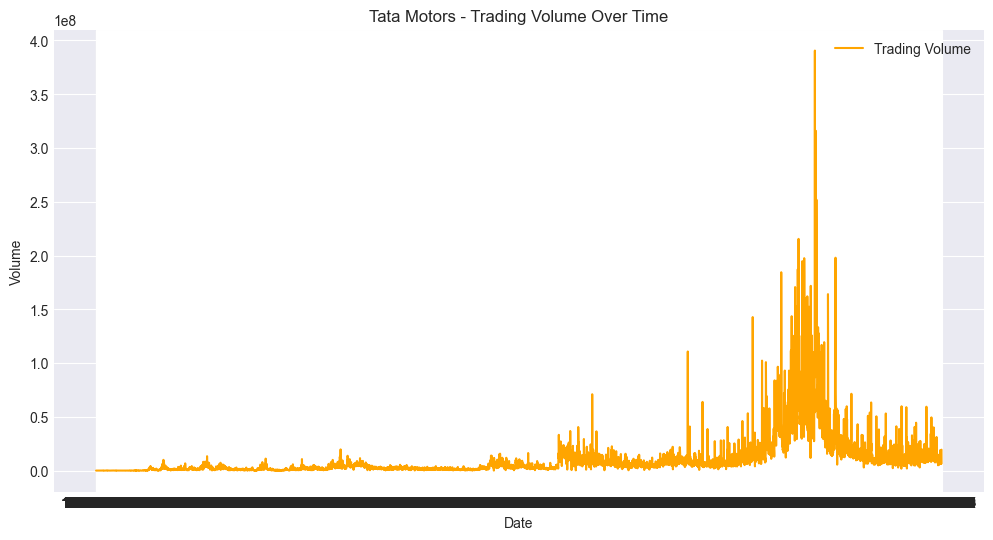

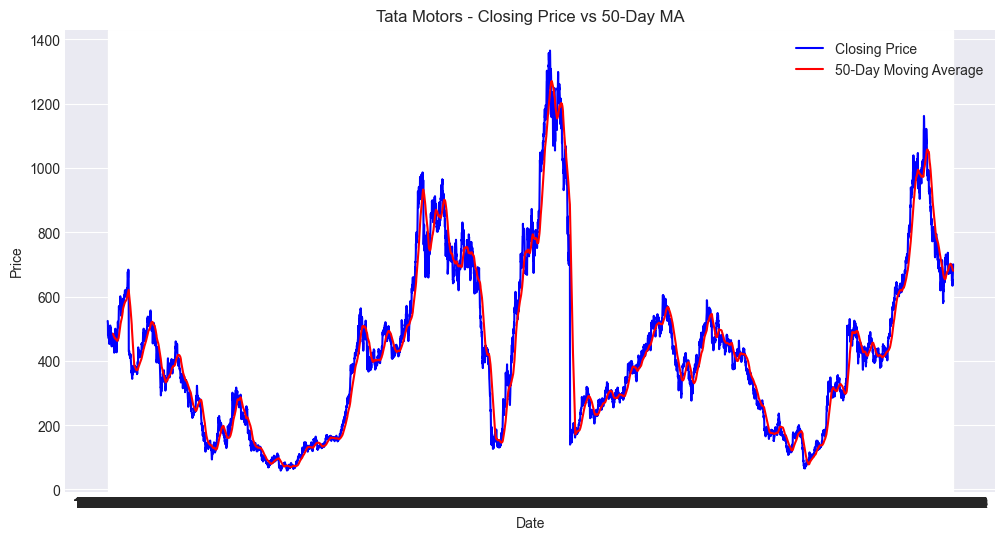

In [15]:
# ----------------------------------
# STEP 5: Bivariate Analysis (Simplified)
# ----------------------------------

# 1️⃣ Line Plot: Closing Price vs Date
if "Date" in df.columns and "Close" in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
    plt.title("Tata Motors - Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.show()

# 2️⃣ Line Plot: Volume vs Date
if "Date" in df.columns and "Volume" in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df["Date"], df["Volume"], label="Trading Volume", color="orange")
    plt.title("Tata Motors - Trading Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.show()

# 3️⃣ Moving Average vs Close Price (if MA_50 exists)
if "MA_50" in df.columns and "Close" in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
    plt.plot(df["Date"], df["MA_50"], label="50-Day Moving Average", color="red")
    plt.title("Tata Motors - Closing Price vs 50-Day MA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


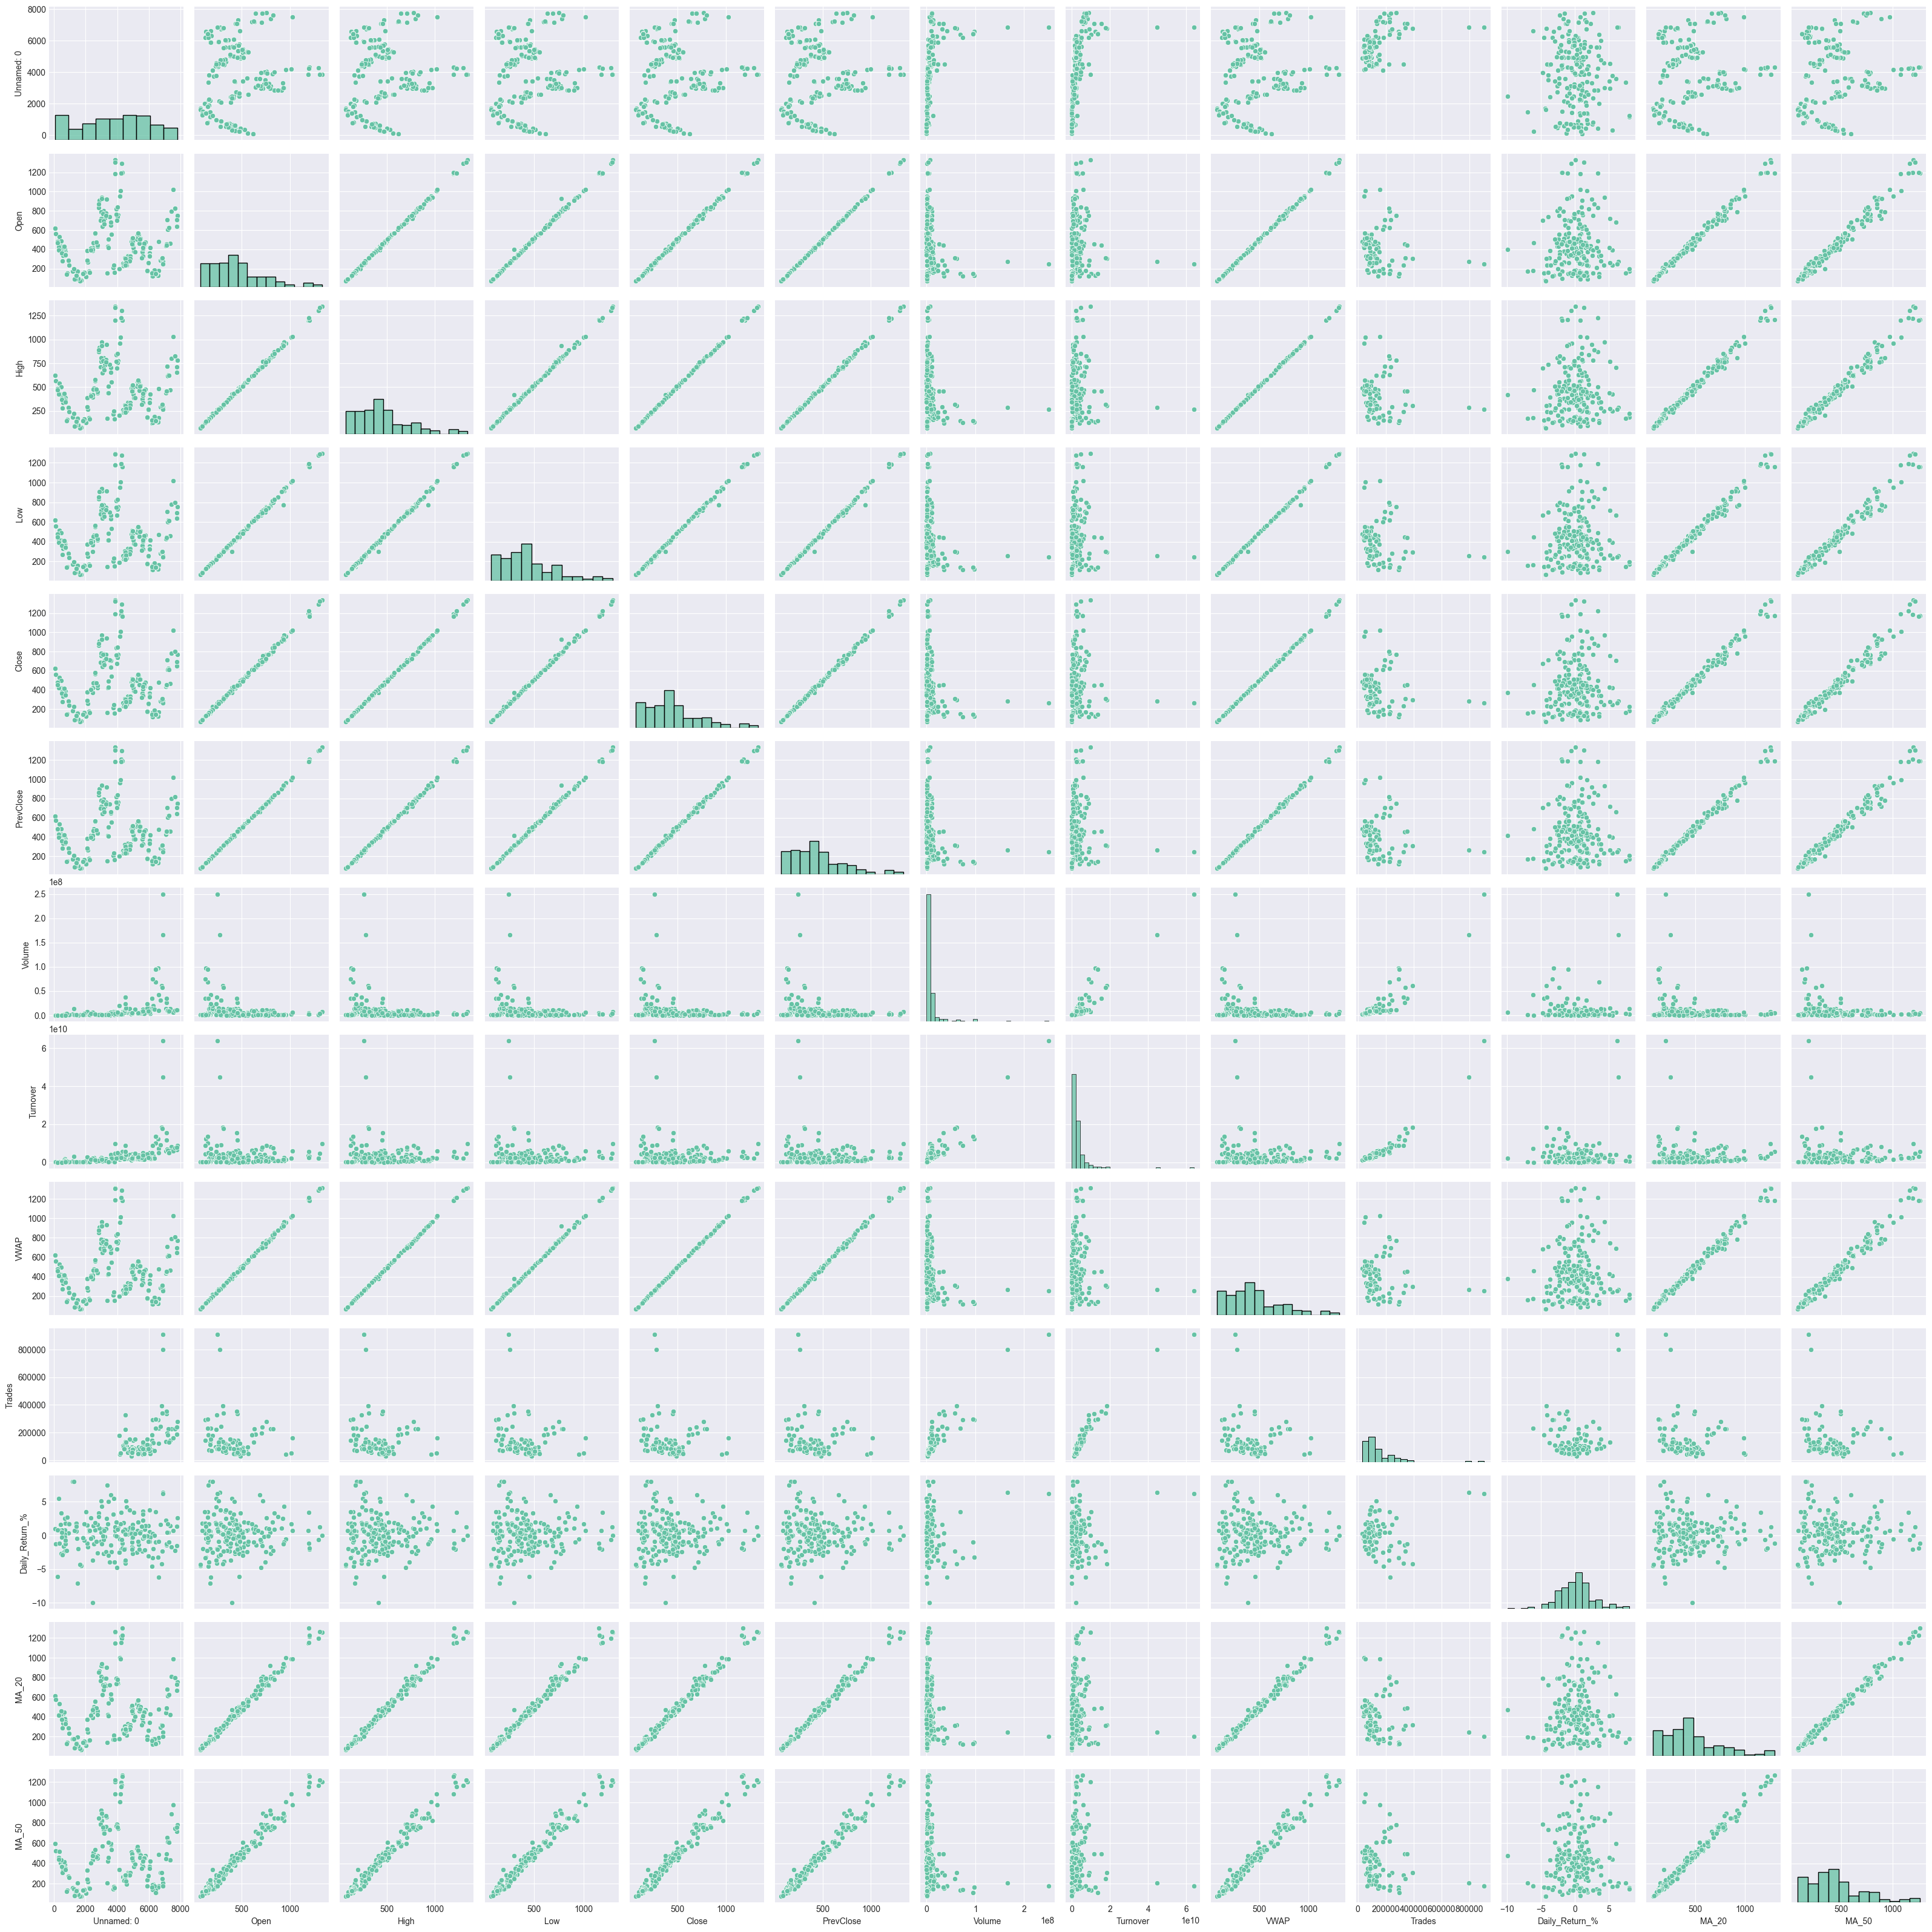

In [16]:
# ----------------------------------
# Step 6: Multivariate Analysis
# ----------------------------------
# Pairplot (only on sample to avoid heavy plotting)
sns.pairplot(df.sample(min(200, len(df))))
plt.show()

# Group by example (replace with relevant columns)
if "Category" in df.columns and "Value" in df.columns:
    print(df.groupby("Category")["Value"].mean())

In [17]:
# ----------------------------------
# Step 7: Hypothesis Testing
# ----------------------------------
# Example: T-test between two groups
if "Gender" in df.columns and "Income" in df.columns:
    g1 = df[df['Gender'] == 'Male']['Income']
    g2 = df[df['Gender'] == 'Female']['Income']
    t_stat, p_val = ttest_ind(g1, g2, nan_policy='omit')
    print("T-test Result:", t_stat, p_val)

# Example: Chi-square test
if "Gender" in df.columns and "Purchase" in df.columns:
    contingency = pd.crosstab(df['Gender'], df['Purchase'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print("Chi-square Result:", chi2, p)

Missing Values in Each Column:
Unnamed: 0           0
Date                 0
Symbol               0
Open                 0
High                 0
Low                  0
Close                0
PrevClose            0
Volume               0
Turnover             0
VWAP                 0
Trades            4187
Daily_Return_%       0
MA_20               19
MA_50               49
dtype: int64
----------------------------------------
Number of Duplicate Rows: 0
----------------------------------------


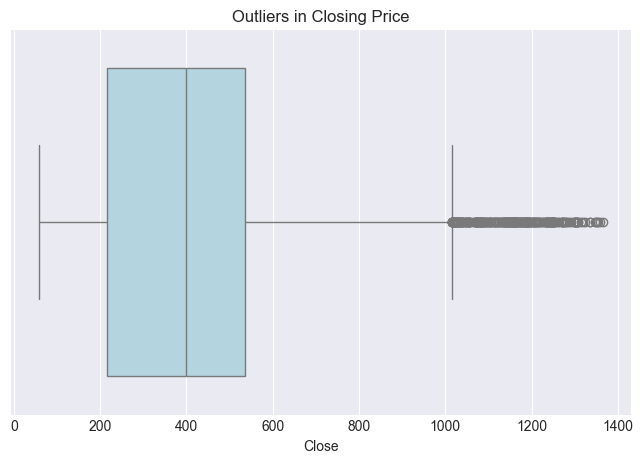


Value counts for Date:
Date
2020-02-19    5
2020-03-03    5
2020-03-04    5
2009-02-10    2
2005-12-27    2
             ..
2025-08-12    1
2025-08-13    1
2025-08-14    1
2025-08-18    1
2025-08-19    1
Name: count, Length: 7618, dtype: int64
----------------------------------------

Value counts for Symbol:
Symbol
TATAMOTORS    7804
Name: count, dtype: int64
----------------------------------------


In [19]:
# ----------------------------------
# STEP 8: Detect Data Issues
# ----------------------------------

# 1️⃣ Check Missing Values
print("Missing Values in Each Column:")
print(df.isnull().sum())
print("-" * 40)

# 2️⃣ Check Duplicates
print("Number of Duplicate Rows:", df.duplicated().sum())
print("-" * 40)

# 3️⃣ Detect Outliers in Closing Price (using Boxplot)
if "Close" in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df["Close"], color="lightblue")
    plt.title("Outliers in Closing Price")
    plt.show()

# 4️⃣ Check Data Balance (for categorical columns if any)
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    print("-" * 40)
